In [1]:
# data visualization

import folium

# 위도
latitude = 35.87133129128506

# 경도
longitude = 128.60182886268527 

m = folium.Map(location=[latitude, longitude],
               zoom_start=12, 
               width=750, 
               height=500
              )
folium.Marker([latitude, longitude],
              popup="대구시청입구",
              tooltip="대구광역시청",
              icon=folium.Icon('darkgreen', icon='star'),
              ).add_to(m)
folium.CircleMarker([latitude, longitude],
                   color='orange',
                   radius = 50,
                   tooltip='대구광역시청 반경').add_to(m)
#m

In [2]:
import pandas as pd

df = pd.read_csv('소상공인시장진흥공단_상가(상권)정보_대구_202206.csv', encoding='cp949')

#df.head(3)

In [3]:
#pd.Series(df.columns)

In [4]:
sub_df = df.loc[df['행정동명'].isin(['동인동', '만촌1동', '황금1동'])]
#sub_df

In [5]:
#sub_df[['위도', '경도', '상호명']]

In [6]:
from folium.plugins import MarkerCluster

# 맵 생성 및 대구 중심값 설정
m = folium.Map(
    location=[latitude, longitude],
    zoom_start=12
)
coords = sub_df[['위도', '경도','상호명','상권업종중분류명']]

marker_cluster = MarkerCluster().add_to(m)

for lat, long, point, tooltip  in zip(coords['위도'], coords['경도'],coords['상호명'],coords['상권업종중분류명']):
    folium.Marker([lat, long],popup=point,tooltip= tooltip, icon = folium.Icon(color='green')).add_to(marker_cluster)

m


In [7]:
import requests
import json

# 대구 행정구역 json raw파일(githubcontent) 파일을 읽어서 r에 저장
r = requests.get('https://raw.githubusercontent.com/yousungkim1216/edu/main/jupyter/southkorea.json')

c = r.content

# 좌표 추출
daegu_geo = json.loads(c)
#daegu_geo

In [8]:
m = folium.Map(
    location=[35.87133129128506,  128.60182886268527],
    zoom_start=12
)

coords = sub_df[['위도', '경도']]

# gps 좌표 추출해서 green 색깔 마커 생성하고, 클러스터링 수행
marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(coords['위도'], coords['경도']):
    folium.Marker([lat, long], icon = folium.Icon(color='green')).add_to(marker_cluster)

folium.GeoJson(
    daegu_geo,
    name='지역구'
).add_to(m)

#m

In [9]:
m = folium.Map(
    location=[35.87133129128506,  128.60182886268527],
    zoom_start=12,
# Statem Toner 적용
    tiles='Stamen Toner'
    
)

coords = sub_df[['위도', '경도']]

marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(coords['위도'], coords['경도']):
    folium.Marker([lat, long], icon = folium.Icon(color='green')).add_to(marker_cluster)

folium.GeoJson(
    daegu_geo,
    name='지역구'
).add_to(m)


#m

In [10]:
daegu = pd.read_csv('소상공인시장진흥공단_상가(상권)정보_대구_202206.csv', encoding='cp949')
daegu = daegu[['시군구명', '상권업종대분류명', '상권업종중분류명', '위도', '경도']]
#daegu

In [11]:
m = folium.Map(
    location=[35.87133129128506, 128.60182886268527 ],
    zoom_start=11, 
# cartodbpositron 적용    
    tiles='cartodbpositron'
)

folium.GeoJson(
    daegu_geo,
    name='지역구'
).add_to(m)
#m

In [12]:
daegu = pd.read_csv('소상공인시장진흥공단_상가(상권)정보_대구_202206.csv', encoding='cp949')
daegu = daegu[['시군구명', '상권업종대분류명', '상권업종중분류명', '위도', '경도']]

#daegu

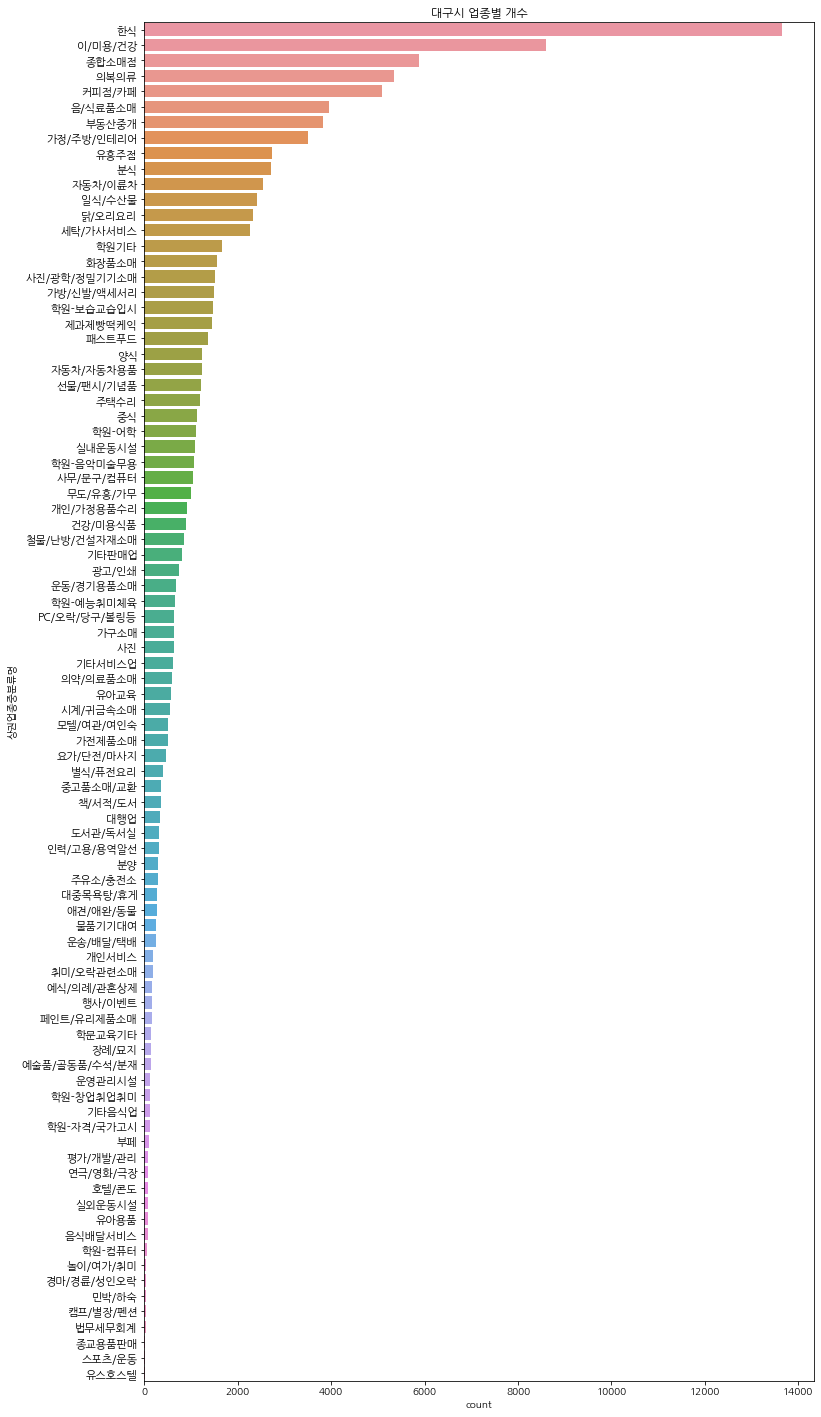

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

#한글 폰트설정
plt.rcParams['font.family'] = 'NanumGothic'


plt.figure(figsize=(12, 25))
sns.countplot(y=daegu['상권업종중분류명'], order=daegu['상권업종중분류명'].value_counts().index)
plt.yticks(fontsize=11)
plt.title('대구시 업종별 개수')
plt.show()

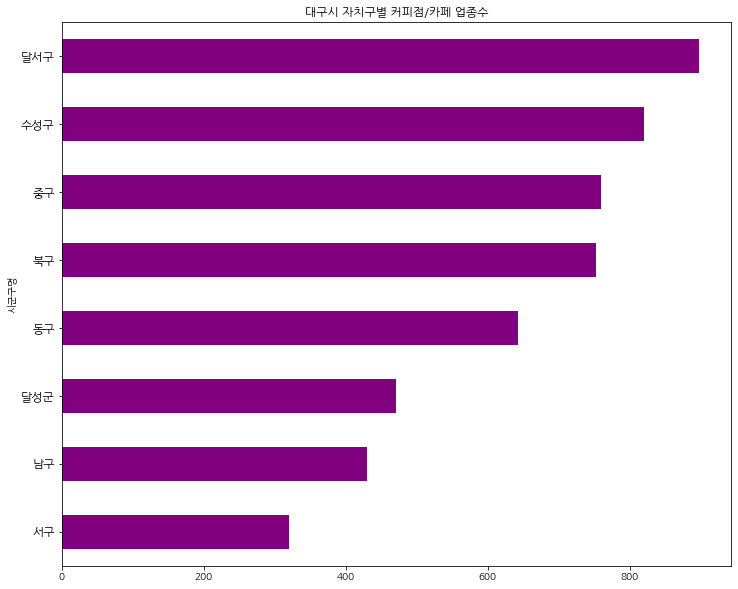

In [14]:
plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(12,10))
daegu.loc[daegu['상권업종중분류명'] == '커피점/카페'].groupby('시군구명')['상권업종대분류명'].count()\
                                                     .sort_values().plot(kind='barh', color='purple')
plt.yticks(fontsize=12)
plt.title('대구시 자치구별 커피점/카페 업종수')
plt.show()

In [15]:
daegu_coffee = daegu.loc[daegu['상권업종중분류명'] == '커피점/카페']
#daegu_coffee

In [16]:
#맵 생성 및 대구 중심값 설정
m = folium.Map(
    location=[35.87133129128506, 128.60182886268527 ],
    zoom_start=11, 
# cartodbpositron 적용    
    tiles='cartodbpositron'
)
# 위경도 좌표를 받아서 대구의 경계를 식별
folium.GeoJson(
    daegu_geo,
    name='지역구'
).add_to(m)

# 카페 업종의 맵 클러스터 기능 활용
marker_cluster = MarkerCluster().add_to(m)

# gps 좌표 추출해서 green 색깔 마커 생성하고, 클러스터링 수행
for lat, long in zip(daegu_coffee['위도'], daegu_coffee['경도']):
    folium.Marker([lat, long], icon = folium.Icon(color="green")).add_to(marker_cluster)
# map 생성

#m

In [17]:
daegu_group_data = daegu.loc[daegu['상권업종중분류명'] == '커피점/카페'].groupby('시군구명')['상권업종중분류명'].count()
#daegu_group_data

In [18]:
m = folium.Map(
    location=[35.871718, 128.6062837],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    daegu_geo,
    name='지역구'
).add_to(m)

# 업종별 개수에 땨른 색상의 차이(단계 구분도)
m.choropleth(geo_data=daegu_geo,
             data=daegu_group_data, 
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="대구 지역구별 커피 업종 수"
            )
#m

C:\Users\phjfr\AppData\Local\Programs\Python\Python310\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [19]:
#구간별로 나눔
bins = list(daegu_group_data.quantile([0, 0.25, 0.5, 0.75, 1]))

m = folium.Map(
    location=[35.871718, 128.6062837],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    daegu_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data=daegu_geo,
             data=daegu_group_data, 
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="대구 지역구별 커피 업종 수",
             bins=bins
            )
#m